In [1]:
import matplotlib.pyplot as plt
#%matplotlib ipympl
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics 
from sklearn.datasets import make_classification
#from xgboost import XGBClassifier
#!pip install xgboost scikit-learn pandas numpy
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\DATA"
path_result = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\result"

In [3]:
#importing model data
df_model=pd.read_csv(path_result+"/"+"model_after_feature_selection.csv", index_col=0)

In [4]:
df_model.columns

Index(['gameID', 'season', 'homeTeamID', 'awayTeamID', 'xGoals_h', 'shots_h',
       'shotsOnTarget_h', 'deep_h', 'ppda_h', 'fouls_h', 'corners_h',
       'total_key_passes_h', 'total_xGoalsChain_h', 'total_xGoalsBuildup_h',
       'total_blocked_shots_h', 'total_saved_shots_h', 'xGoals_a', 'shots_a',
       'shotsOnTarget_a', 'deep_a', 'ppda_a', 'fouls_a', 'total_key_passes_a',
       'total_xGoalsChain_a', 'total_xGoalsBuildup_a', 'total_saved_shots_a',
       'game_year', 'game_month', 'game_day', 'yellowCards_h_cat',
       'yellowCards_a_cat', 'total_assists_h_cat', 'total_assists_a_cat',
       'home_shots_h_rolling5', 'home_shotsOnTarget_a_rolling5',
       'away_shots_h_rolling5', 'away_shots_a_rolling5',
       'away_shotsOnTarget_a_rolling5', 'result'],
      dtype='object')

In [5]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res

In [6]:
df_model['result'].value_counts()

result
2.0    5654
0.0    3854
1.0    3172
Name: count, dtype: int64

In [7]:
# Ensure the target column 'result' exists in the dataset
if 'result' in df_model.columns:
    # Define target
    y = df_model['result']
    
    # Define features by dropping the target column
    X = df_model.drop(columns=['result'])

    # Split into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )

    # Show the shapes of the resulting sets
    split_shapes = {
        "X_train": X_train.shape,
        "X_test": X_test.shape,
        "y_train": y_train.shape,
        "y_test": y_test.shape
    }
else:
    split_shapes = "❌ Column 'result' not found in dataset."

split_shapes


{'X_train': (10144, 38),
 'X_test': (2536, 38),
 'y_train': (10144,),
 'y_test': (2536,)}

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
models_list = pd.DataFrame()

In [10]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Classification metrics function
def classificationMetrics(y_true, y_pred, y_proba=None):
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )

    result = {
        'Accuracy': metrics.accuracy_score(y_true, y_pred),
        'Precision': precision,
        'Recall': recall,
        'f1-score': f1
    }

    if y_proba is not None:
        try:
            result['Log-loss'] = metrics.log_loss(y_true, y_proba)
            result['AUC'] = metrics.roc_auc_score(y_true, y_proba, multi_class='ovr')
        except:
            result['Log-loss'] = None
            result['AUC'] = None
    else:
        result['Log-loss'] = None
        result['AUC'] = None

    return result


In [11]:

# Model list
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ("SVM", SVC(probability=True)),
    ("Extra Trees", ExtraTreesClassifier())
]

# Store metrics and confusion matrices
models_list = pd.DataFrame()
confusion_matrices = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    try:
        y_proba = model.predict_proba(X_test)
    except:
        y_proba = None

    # Metrics
    model_dict = {'Model': name}
    metrics_dict = classificationMetrics(y_test, y_pred, y_proba)
    row = pd.DataFrame([{**model_dict, **metrics_dict}])
    models_list = pd.concat([models_list, row], ignore_index=True)

    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm

models_list


,Model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.668375,0.619966,0.613712,0.605158,0.740348,0.822372
1,Decision Tree,0.688880,0.658988,0.656010,0.657309,11.213897,0.748995
2,Random Forest,0.772476,0.741598,0.736559,0.736755,0.569089,0.909801
3,AdaBoost,0.739748,0.708819,0.700114,0.702821,1.028989,0.849719
4,Gradient Boosting,0.792587,0.767207,0.766450,0.766790,0.477086,0.929830
5,XGBoost,0.842666,0.824444,0.821297,0.822690,0.390982,0.949483
6,SVM,0.450315,0.150105,0.333333,0.206997,0.996264,0.667261
7,Extra Trees,0.779968,0.750481,0.741154,0.741281,0.574589,0.916683


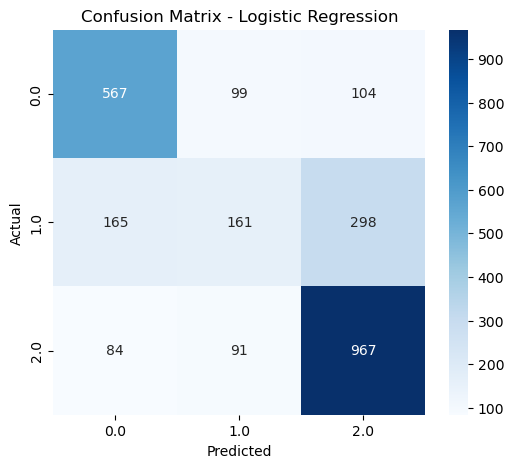

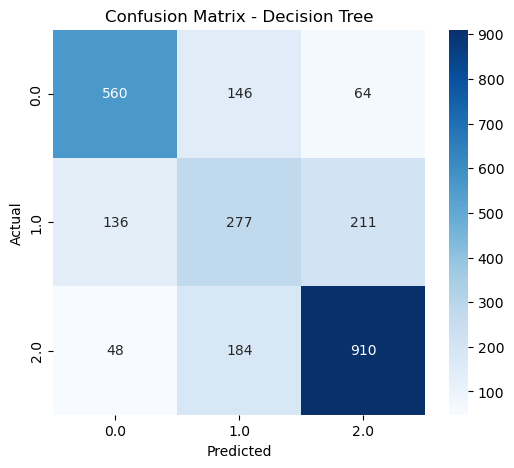

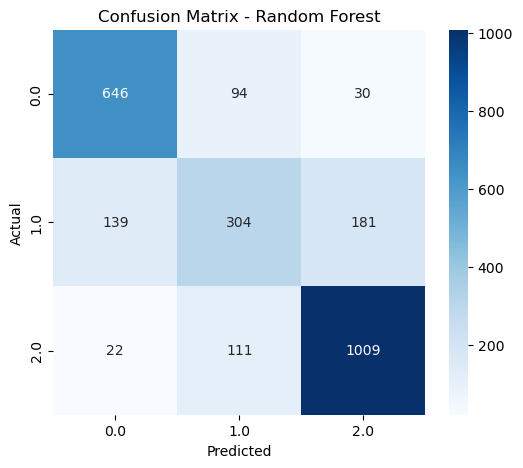

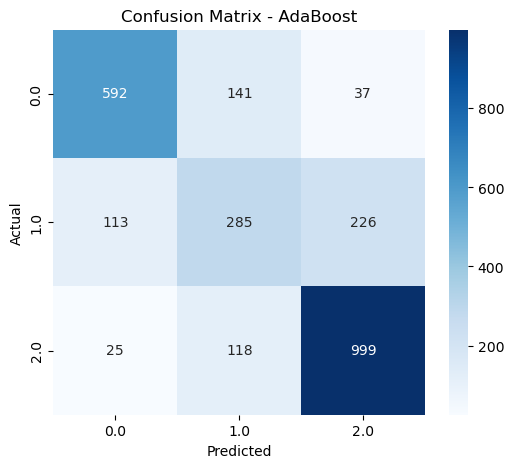

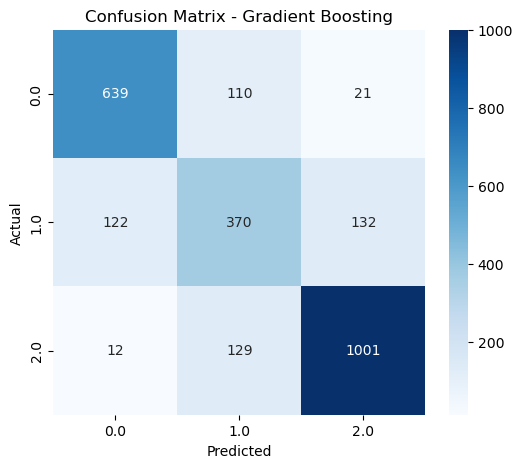

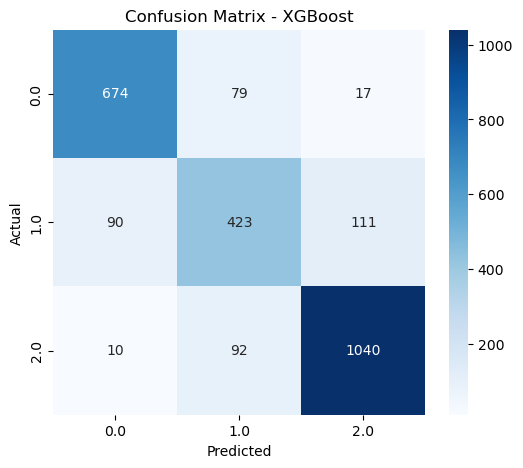

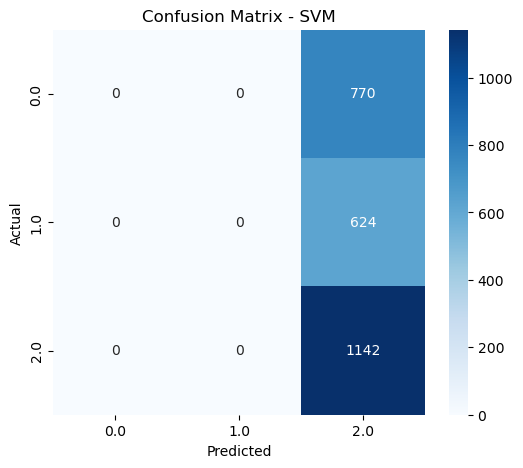

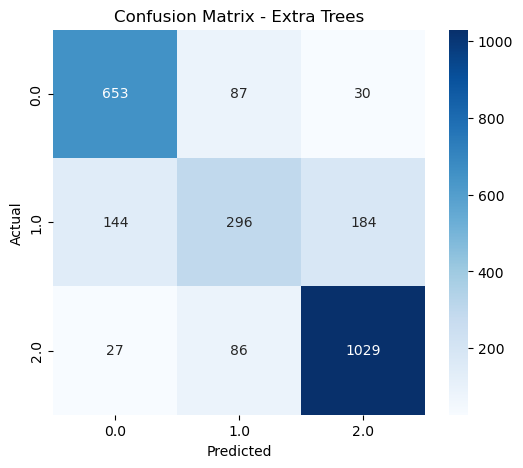

In [13]:
def plot_confusion_matrix(cm, labels, title="Confusion Matrix"):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
labels = sorted(y_test.unique())  # Get sorted class labels from your y_test

for model_name in models_list['Model']:
    cm = confusion_matrices.get(model_name)
    if cm is not None:
        plot_confusion_matrix(cm, labels, title=f"Confusion Matrix - {model_name}")
    else:
        print(f"No confusion matrix found for {model_name}")


## XGBoost provides the best results with 84% accuracy

### Hyperparameter Finetuning

In [14]:
%pip install --upgrade xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import numpy as np

from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0
)


from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define parameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    scoring=make_scorer(f1_score, average='macro'),
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run it!
random_search.fit(X_train, y_train)

# Get the best model and performance
best_xgb = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print("✅ Best Parameters:", best_params)
print("🎯 Best F1 Score (CV):", best_score)



Note: you may need to restart the kernel to use updated packages.
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7}
🎯 Best F1 Score (CV): 0.7876506378795641
